recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

In [1]:
#imports

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from pylab import rcParams
from mpl_toolkits import mplot3d
import math
from scipy.integrate import solve_ivp

In [21]:
a = 0.05
b = 0.01
c = 0.0025
d = 0.05
e = 0.25
f = 0.0125*5
g = 0.05
h = 0.2
j = 1*0.8
k = 500
z = (b*e*g-a*d*h+b*d*j)/(b*f*g-c*d*h+((b*d*j)/k))

x_e = (c*e*h - a*f*h+b*f*j*(1-(z/k)))/(b*f*g -c*d*h)
y_e = (c*e*g-a*f*g+c*d*j*(1-(z/k)))/(-b*f*g+c*d*h)
z_e = z

print(x_e)
print(y_e)
print(z_e)


-0.5673758865248382
4.113475177304968
3.5460992907801283


BELOW: RK4 METHOD


In [2]:
# p[0] = x, p[1] = y, p[2] = z.
def LotkaVolterraModel(p, params):
    """ p = vector in 3D
    params = dictionary of the parameters used.
    """
    a = params["a"]
    b = params["b"]
    c = params["c"]
    d = params["d"]
    e = params["e"]
    f = params["f"]
    g = params["g"]
    h = params["h"]
    j = params["j"]
    k = params["k"]
  
    # Calculate deltaX, deltaY, deltaZ in vector form
    deltaP = np.array([- a * p[0] + b * p[0] * p[1] + c * p[0] * p[2], - d * p[0] * p[1] - e * p[1] + f * p[1] * p[2], - g * p[0] * p[2] - h * p[1] * p[2] + (j * p[2])*(1 - p[2]/k)])    

    return deltaP


In [3]:
# RK4 method
def RungeKutta4(func, p0, t0, tf, dt):
    """func = function applied
         p0   = 3D starting point
         t0   = initial time
         tf   = final time
         dt   = step size
         """
    t = np.arange(t0, tf, dt)                                   #create time vector
    number_of_t_elements = t.size                               # tf/dt
    number_of_p_elements = p0.size                              # 3        
    p = np.zeros((number_of_p_elements, number_of_t_elements))  #create initial solution

    p[:,0] = p0                                                 #initialize starting point p0

    for i in range(number_of_t_elements - 1):
        k1 = dt*func(t[i], p[:,i])
        k2 = dt*func(t[i] + dt/2, p[:,i] + k1/2)
        k3 = dt*func(t[i] + dt/2, p[:,i] + k2/2)
        k4 = dt*func(t[i] + dt, p[:,i] + k3)

        dp = (k1 + 2*k2 + 2*k3 + k4)/6                            #result of runge kutta method, a 3D vector representing dp/dt

        p[:, i+1] = p[:,i] + dp                                   #for every run, add dp to the solution matrix

    return p, t




In [12]:
# Define problem

# our constants
params = {"a": 0.05, "b": 0.01, "c": 0.0025, "d": 0.05, "e": 0.25, "f": 0.0125, "g": 0.05, "h": 0.2, "j": 1, "k":100} 

function = lambda t, p : LotkaVolterraModel(p, params)        #the function we apply RK4 to

# initial values
p0 = np.array([1,5,20])                                     #([x0,y0,z0])



In [13]:
# Solve differential equation

t0 = 0                                                        #starting time
tf = 1000                                                     #end time
dt = 0.01                                                     #time step

iterations_RK4 = int(tf/dt)
print(iterations_RK4)

p, t = RungeKutta4(function, p0, t0, tf, dt)

100000


Text(0.5, 0.92, 'phase space RK4')

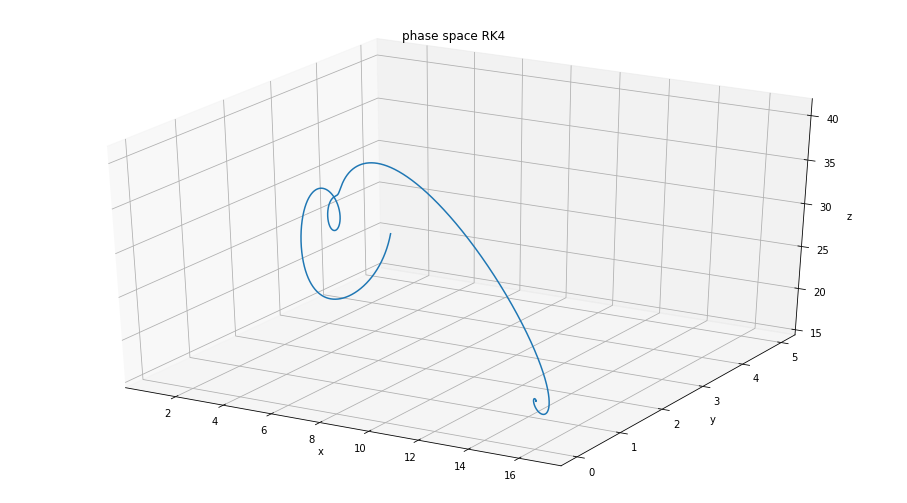

In [14]:
# Second plot


ax = plt.axes(projection='3d')
ax.plot3D(p[0,:], p[1,:], p[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("phase space RK4")
#plt.savefig('phase_space_rk4_fail.png')

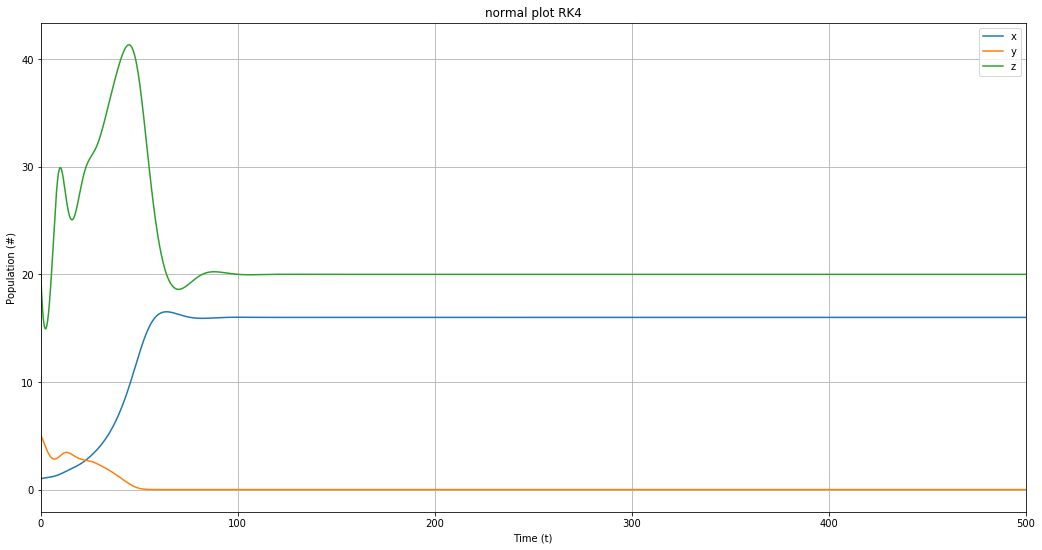

In [15]:
# Plotting

rcParams['figure.figsize'] = 60, 9
plt.subplot(1, 3, 1)
plt.plot(t, p[0,:], label="x")
plt.plot(t, p[1,:], label="y")
plt.plot(t, p[2,:], label="z")
plt.xlabel("Time (t)")
plt.ylabel("Population (#)")
plt.title("normal plot RK4")
plt.xlim(0,500)
plt.grid()
plt.legend()
#plt.savefig('normal_rk4_1000_fail')
plt.show()


#plt.subplot(1, 3, 1)
#plt.semilogy(t, p[0,:], label="x")
#plt.semilogy(t, p[1,:], label="y")
#plt.semilogy(t, p[2,:], label="z")
#plt.xlabel("Time (t)")
#plt.ylabel("Population (#)")
#plt.title("logarithmic plot RK4")
#plt.xlim(0,500)
#plt.grid()
#plt.legend()
#plt.savefig('logarithmic_rk4_1000_fail')
#plt.show()


ABOVE: RK4 METHOD 


BELOW: FW EULER METHOD

In [16]:
#initial values

x = 1
y = 5
z = 20

a = 0.05
b = 0.01
c = 0.0025
d = 0.05
e = 0.25
f = 0.0125*5
g = 0.05
h = 0.2
j = 1*0.8
k = 1


step = 0.001  # the smaller the more precise plots are
epochs = 1000

In [17]:

xOverTime = []
yOverTime = []
zOverTime = []


for i in range(int(1 / step) * epochs):
    xOverTime.append(x)
    yOverTime.append(y)
    zOverTime.append(z)
    deltaX = - a * x + b * x * y + c * x * z
    deltaY = - d * x * y - e * y + f * y * z
    deltaZ = - g * x * z - h * y * z + (j * z)*(1 - z/k)
    x += step * deltaX
    y += step * deltaY
    z += step * deltaZ
    

iterations_FWE = int(epochs/step)
print(iterations_FWE)

1000000


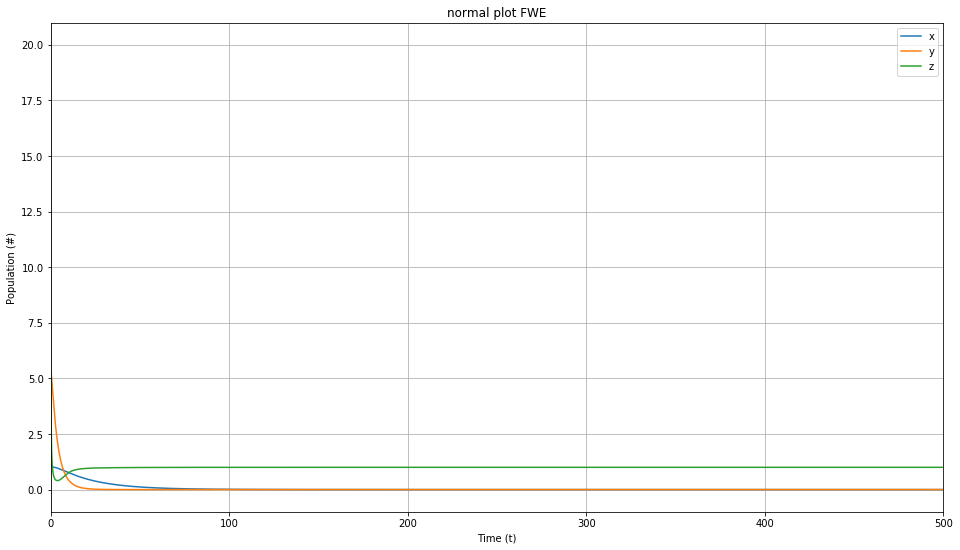

In [18]:
#plotting


#rcParams['figure.figsize'] = 16, 9
#plt.gca().xaxis.grid(True)
#plt.gca().yaxis.grid(True)
#plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x * step), ',')))
#plt.xlabel("Time (t)")
#plt.ylabel("Population (#)")
#plt.title("logarithmic plot FWE")
#plt.semilogy(xOverTime, label="x")
#plt.semilogy(yOverTime, label="y")
#plt.semilogy(zOverTime, label="z")
#plt.legend(loc='upper right')
#plt.show()

rcParams['figure.figsize'] = 16, 9
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x * step), ',')))
plt.xlabel("Time (t)")
plt.ylabel("Population (#)")
plt.title("normal plot FWE")
plt.xlim(0,500000)
plt.plot(xOverTime, label="x")
plt.plot(yOverTime, label="y")
plt.plot(zOverTime, label="z")
plt.legend(loc='upper right')

plt.show()
#plt.savefig('normal_plot_FWE_1000.png')



Text(0.5, 0.92, 'phase space FWE')

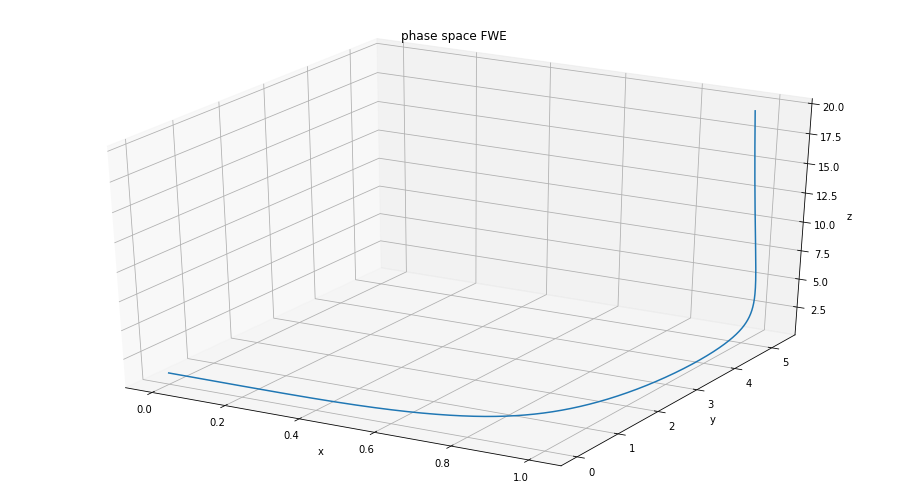

In [19]:
# second plot

#TODO: set grid, label axes, make legend
ax = plt.axes(projection='3d')
ax.plot3D(xOverTime, yOverTime, zOverTime)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("phase space FWE")
#plt.savefig('phase_space_FWE_1000.png')

